<a href="https://colab.research.google.com/github/misbah-coder/App-Rating-Prediction/blob/main/MisbahF_Gender_PayGap_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing modules 
Importing matplotlibe for data visualization,
Importing Pandas for operations with dataframes,Importing Seaborn visualization library

In [ ]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


**Loading** the data set gender pay: https://www.kaggle.com/datasets/nilimajauhari/glassdoor-analyze-gender-pay-gap
 

**Description** of the dataset: the dataset look clean with no Null values 



In [ ]:
df = pd.read_csv('/content/Glassdoor Gender Pay Gap.csv', sep=';')
df

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


In [ ]:
df.describe()

,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


In [ ]:
#null check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


AS the Total Pay is a combination Base Pay and Bonus so I can help in Regression Model  and understaing the Gender Gap overall 

In [ ]:
df['TotalPay'] = df['BasePay'] + df['Bonus']
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalPay
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783


why are you checking this?

In [ ]:
pd.unique(df['PerfEval'])

array([5, 4, 3, 2, 1])

In [ ]:
pd.unique(df['Seniority'])

array([2, 5, 4, 3, 1])

separating dataset to check for outliers

In [ ]:
femaleDs = df[df['Gender'] == 'Female'].loc[:,['TotalPay','BasePay','JobTitle', 'Education', 'Seniority']]
maleDs = df[df['Gender'] == 'Male'].loc[:,['TotalPay','BasePay','JobTitle', 'Education', 'Seniority']]

## **Outliners**

In [ ]:
import plotly.graph_objs as go
boxFemale = go.Box(y = femaleDs.TotalPay,
                name = 'Female',
                marker = {'color': '#e74c3c'})
boxMale = go.Box(y = maleDs.TotalPay,
                name = 'Male',
                marker = {'color': '#00a000'})

data = [boxFemale, boxMale]

layout = go.Layout(title = 'Salary breakdown by gender',
                   titlefont = {'family': 'Arial',
                                'size': 22,
                                'color': '#7f7f7f'},
                   xaxis = {'title': 'Gender'},
                   yaxis = {'title': 'Wage'},
                   paper_bgcolor = 'rgb(243, 243, 243)',
                   plot_bgcolor = 'rgb(243, 243, 243)')


fig = go.Figure(data=data, layout=layout)

In [ ]:
import plotly.offline as py
py.iplot(fig)

# Notice:
Outliners are the values that can effect the calculations as the values lies an abnormal distance.An outlier can cause serious problems in statistical analyses. 

In [ ]:
femaleDs.sort_values(by=['TotalPay'], inplace=True)
maleDs.sort_values(by=['TotalPay'], inplace=True)



In [ ]:
maleDs['TotalPay'].iloc[-2:] #get the last 2 rows

353    183562
927    184010
Name: TotalPay, dtype: int64

In [ ]:
femaleDs['TotalPay'].iloc[-5:] # get the last 5 rows of dataframe female

707    152243
835    155013
96     155151
327    163011
357    168968
Name: TotalPay, dtype: int64

In [ ]:
femaleDs = femaleDs.drop([357,327]) #droping outlier
maleDs = maleDs.drop([927, 353])  #droping outlier

# Seaborn visualization 

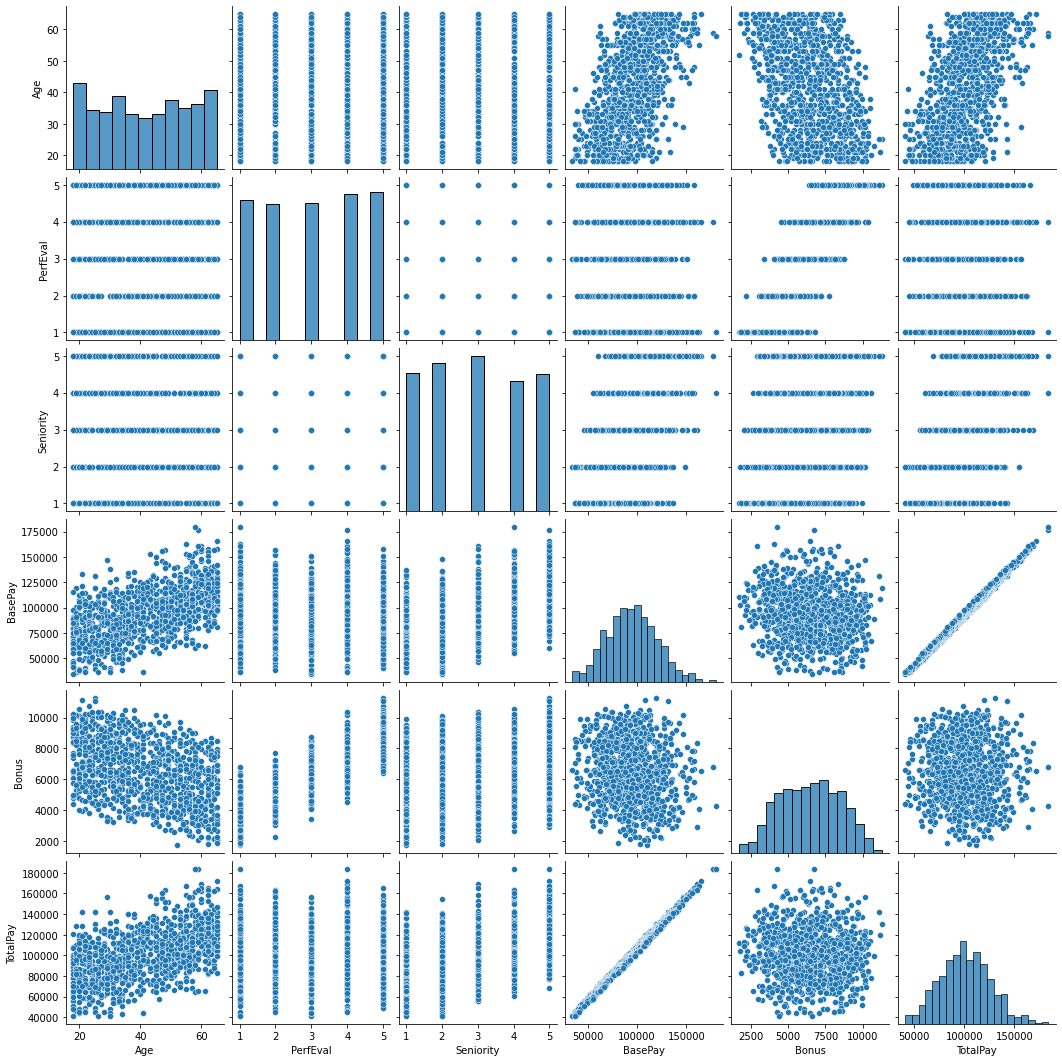

In [ ]:
#convert number
# Create the default pairplot
sns.pairplot(df)

# Notice:
Negative Correlation higher the Bonus and low the Age 
Positive Correlation higer the Base Pay so Higer the Total Pay

# Heat Map

In [ ]:
df = pd.read_csv('/content/Glassdoor Gender Pay Gap.csv')

In [ ]:
df['TotalPay'] = df['BasePay'] + df['Bonus']

In [ ]:
df = df.groupby(['Seniority', 'Gender'])['TotalPay'].sum().to_frame('TotalPay').reset_index()

In [ ]:
pivoted = df.pivot('Seniority', 'Gender', 'TotalPay')

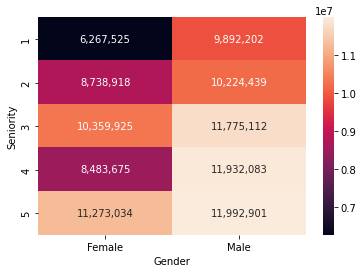

In [ ]:
sns.heatmap(pivoted, annot=True, fmt=',')

# Notice:
The Heat Map shows a clearer difference between the Gender Gap that Female start low and struggles for 5 years to came to a higher pay bracket.On the other hand after 2 years in work Men trends to be in Higher pay bracket.
In the higher pay bracket Female are still paid less then Men. 

# Check Piont 

In [ ]:

data = df
data.head()

,Seniority,Gender,TotalPay
0,1,Female,6267525
1,1,Male,9892202
2,2,Female,8738918
3,2,Male,10224439
4,3,Female,10359925


## Multiple Linear Regression

Importing modules sklearn for Regression the model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
import sklearn

In [ ]:
data = pd.read_csv('/content/Glassdoor Gender Pay Gap.csv')
data

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


In [ ]:
data['TotalPay'] = data['BasePay'] + data['Bonus']
data.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalPay
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783


In [ ]:
le = LabelEncoder()

In [ ]:
data['new_Gender'] = le.fit_transform(data['Gender'])
data.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalPay,new_Gender
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301,0
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604,1
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476,0
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234,1
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783,1


In [ ]:
data['new_Edu'] = le.fit_transform(data['Education'])

In [ ]:
data

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalPay,new_Gender,new_Edu
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301,0,0
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604,1,0
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476,0,3
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234,1,2
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270,65914,0,1
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567,112544,1,2
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724,95071,1,1
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225,99601,1,1


# Spilt the data to Train and Test  

In [ ]:
x=data[['Age', 'PerfEval', 'Seniority', 'BasePay', 'Bonus', 'new_Gender', 'new_Edu']]

y=data['TotalPay']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 0)

In [ ]:
print(X_train)

     Age  PerfEval  Seniority  BasePay  Bonus  new_Gender  new_Edu
687   20         1          2    76908   4756           0        0
500   58         5          1    86651   7250           1        1
332   22         3          4    76865   8145           0        0
979   52         1          3    97696   3888           0        3
817   61         2          2   107064   4202           0        3
..   ...       ...        ...      ...    ...         ...      ...
835   45         1          5   149893   5120           0        1
192   40         5          4   102815   9090           1        2
629   23         1          4    78084   5598           0        1
559   53         3          3   106146   6618           1        1
684   48         2          3    79765   5329           0        0

[800 rows x 7 columns]


In [ ]:
print('Train set:', X_train.shape, y_train.shape)

Train set: (800, 7) (800,)


In [ ]:
print('Test set:', X_test.shape,y_test.shape)

Test set: (200, 7) (200,)


In [ ]:
reg_model = linear_model.LinearRegression()


In [ ]:
reg_model.fit (X_train, y_train)

LinearRegression()

# Coefficients of Columns  

In [ ]:
print(f'Coefficients:{reg_model.coef_}')


Coefficients:[-3.98018193e-13  2.71027645e-12 -4.60728054e-12  1.00000000e+00
  1.00000000e+00 -2.36899513e-13 -8.43895764e-14]


# Reg Coefficients

In [ ]:
print(f'Coefficients:{reg_model.intercept_}')

Coefficients:2.9103830456733704e-11


# Mean Squared Error 

In [ ]:
y_test_pred = reg_model.predict(X_test)
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_test_pred)}')

Mean Squared Error (MSE): 2.0805246766933753e-22


# R2 Score tells how much the model fall into goodness of fit.

In [ ]:
print(f'R2 Score : {r2_score(y_test, y_test_pred)}')

R2 Score : 1.0


## Input data to predict estimated salary

In [ ]:
employee_data = [[20,1, 2,76908,4756,0,0]]
salary = reg_model.predict(employee_data)
print(f'Estimated salary:{salary[0]:.2f} USD')

Estimated salary:81664.00 USD


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

